In [491]:
import sys
import notebookutil as nbu
sys.meta_path.append(nbu.NotebookFinder())
import datasets
import pandas as pd
import numpy as np
import roc_auc
import estimator_knn as knn
import estimator_rssibased as rssie
import json

In [233]:
# data loader
ds = datasets.load('data/raw/0[12]_[01][123]_0[1234]*_*')

path = data/raw/0[12]_[01][123]_0[1234]*_*
data/raw/01_01_01_4F実験室_XperiaZ3_胸ポケット_裏上_正常_まっすぐ帰宅
..............................
data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅
...x..........................
data/raw/01_01_03_4F実験室_XperiaZ3_胸ポケット_裏上_正常_5秒後まっすぐ帰宅
.........................x....
data/raw/01_01_04_4F実験室_XperiaZ3_カバン_裏上_正常_5秒後まっすぐ帰宅
.....................x........
data/raw/01_02_01_4F実験室_XperiaZ3_胸ポケット_裏上_異常_まっすぐ外出
..............................
data/raw/01_02_02_4F実験室_XperiaZ3_ズボン_裏上_異常_まっすぐ外出
..............................
data/raw/01_02_03_4F実験室_XperiaZ3_カバン_裏上_異常_まっすぐ外出
..............................
data/raw/01_03_01_4F実験室_XperiaZ3_胸ポケット_裏上_異常_まっすぐ帰宅
..............................
data/raw/01_03_02_4F実験室_XperiaZ3_ズボン_裏上_異常_まっすぐ帰宅
..............................
data/raw/01_03_03_4F実験室_XperiaZ3_カバン_裏上_異常_まっすぐ帰宅
..............................
data/raw/01_11_01_エネマネハウス_XperiaZ3_胸ポケット_裏上_正常_まっすぐ帰宅
..............................
data/raw/01_11_02_エネマネハウス_XperiaZ3_カバン_裏上_正常_まっす

In [ ]:
def knn_combinations

In [531]:
def hoge():
    df = pd.DataFrame([[1,2,3],[1,np.nan,2],[4,5,np.nan]])
    df[1]
    return df[1] < df[2]
hoge()

0     True
1    False
2    False
dtype: bool

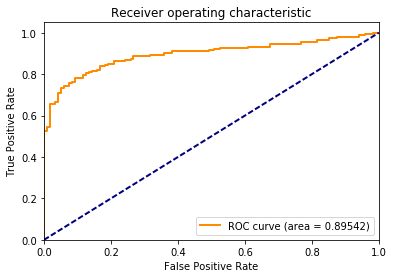

auc 0.89542


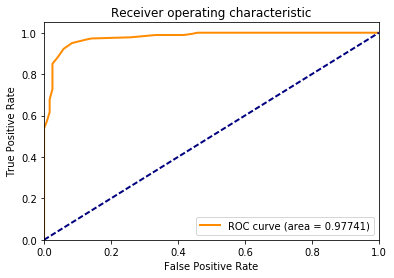

auc 0.97741


,algorithm,auc,ma_window,model_idx,ms_interval,n_neighbors,n_record,n_train,sensor_type,type
5,ball_tree,0.895417,1,0,100,1.0,1,1,"[[linear_accel[0], linear_accel[1], linear_acc...",kNN
6,NaN,0.977407,1,1,20,NaN,1,1,"[rssi.a, rssi.b]",rssi_based


In [590]:
# grid search implementation (under test)
def _get_estimator_models():
    # knn parameters
    range_n_neighbors = np.arange(1, 5, 5)
    
    # create estimator list
    models = []
    mesh_data = np.meshgrid(range_n_neighbors)
    for n_neighbors, in zip(mesh_data[0].ravel()):
        models.append(knn.EstimatorKNN(n_neighbors=n_neighbors))
    models.append(rssie.EstimatorRssiBased())
    return models

def _get_grid_test_case(models):
    # other  parameters
    sensor_type_master = [
        ['rssi.a', 'rssi.b'],
        [['linear_accel[0]', 'linear_accel[1]', 'linear_accel[2]']]
    ]
    range_n_record = np.arange(1, 10, 10)
    range_n_train = np.arange(1, 20, 20)
    range_ms_interval = np.array([20, 40, 100])
    range_ma_window = np.arange(1, 4, 4)
    range_sensor_type = sensor_type_master # to be combinationable
    
    mesh_data = np.meshgrid(range(len(models)), range_n_record, range_n_train,
                            range_ms_interval, range_ma_window, range_sensor_type)

    # create grid test case
    test_case = []
    for model_idx, n_record, n_train, ms_interval, ma_window, sensor_type in zip(mesh_data[0].ravel(), mesh_data[1].ravel(), mesh_data[2].ravel(),
               mesh_data[3].ravel(), mesh_data[4].ravel(), mesh_data[5].ravel()):
        model = models[model_idx]
                            
        # save test case and result
        _t = {'model_idx': model_idx, 'n_record': n_record, 'n_train': n_train,
              'ms_interval': ms_interval, 'ma_window': ma_window, 'sensor_type': sensor_type}
        _t.update(model.get_params())
        _t['type'] = model.get_type()
        _t['auc'] = np.nan
        test_case.append(_t)
    
    # create df for test case
    df = pd.DataFrame(test_case)
    return df

def _remove_unavailable_test_case(df):
    # remove unavailable test case
    df = df[~(df['n_train'] < df['n_neighbors'])]
    df = df[~((df['type'] == 'rssi_based') & (~df['sensor_type'].apply(lambda x: 'rssi.a' in x)))]
    #df = df[~((df.neighbor == 3) & (df['sample'] == 10))]
    return df

def _run_test(df, models):
    # set the data title
    base = '01_11_01'
    normal = '^01_11'
    anomaly = '^01_1[23]'

    # run test
    for k, t in df.iterrows():
        auc = eval_estimator(models[t['model_idx']], base=base, normal=normal, anomaly=anomaly,
                             n_train=t['n_train'], sensor_type=t['sensor_type'], n_record=t['n_record'],
                             ms_interval=t['ms_interval'], ma_window=t['ma_window'])
        df.loc[[k], 'auc'] = auc
    
    return df

def test():
    models = _get_estimator_models()
    df = _get_grid_test_case(models)
    df = _remove_unavailable_test_case(df)
    df = df[5:7]
    df = _run_test(df, models)
    df.to_csv('test_record.csv')
    
    return df

test()

In [453]:
def read_csv():
    f = lambda x : json.loads(x.replace("'","\""))
    df = pd.read_csv('test_record.csv', converters={'sensor_type': f}, index_col=0)
    return df
#read_csv()

,ma_window,ms_interval,n_neighbor,n_record,n_train,sensor_type,auc
0,1,20,1,1,1,"[rssi.a, rssi.b]",0.928981
1,1,20,1,1,1,"[[linear_accel[0], linear_accel[1], linear_acc...",0.990231


In [490]:
importlib.reload(rssie)

<module 'estimator_rssibased' from 'estimator_rssibased.ipynb'>

In [589]:
# general estimator test
def eval_estimator(
    model,
    sensor_type = ['rssi.a','rssi.b', ['linear_accel[0]','linear_accel[1]','linear_accel[2]']],
    n_record = 3,
    base = '01_11_01',
    normal = '^01_11',
    anomaly = '^01_1[23]',
    ms_interval = 20,
    ma_window = 3,
    n_train = 3,
    normalize = True):
    
    # recalc input
    drop_interval = int(ms_interval / 20)
    
    # get data
    dfl_t = datasets.get_data(ds, title=base, before=n_record,
                              column=sensor_type, drop_interval=drop_interval)[:n_train]
    dfl_n = datasets.get_data(ds, title=normal, before=n_record,
                              column=sensor_type, drop_interval=drop_interval)
    dfl_o = datasets.get_data(ds, title=anomaly, before=n_record,
                              column=sensor_type, drop_interval=drop_interval)

    # moving average
    dfl_t = datasets.moving_average(dfl_t, window=ma_window, min_periods=ma_window)
    dfl_n = datasets.moving_average(dfl_n, window=ma_window, min_periods=ma_window)
    dfl_o = datasets.moving_average(dfl_o, window=ma_window, min_periods=ma_window)
    
    # normalize
    if normalize == True:
        dfl_t_n = datasets.normalize_by_base_data(dfl_t, dfl_t, sensor_type)
        dfl_n_n = datasets.normalize_by_base_data(dfl_t, dfl_n, sensor_type)
        dfl_o_n = datasets.normalize_by_base_data(dfl_t, dfl_o, sensor_type)

    # get numpy array
    data_2d_t = [df.as_matrix() for df in dfl_t_n]
    data_2d_n = [df.as_matrix() for df in dfl_n_n]
    data_2d_o = [df.as_matrix() for df in dfl_o_n]

    # to list of numpy.array
    data_t = [d.ravel() for d in data_2d_t]
    data_n = [d.ravel() for d in data_2d_n]
    data_o = [d.ravel() for d in data_2d_o]

    model.fit(data_t)
    score_n = model.decision_function(data_n)
    score_o = model.decision_function(data_o)
    auc = roc_auc.get_auc_from_normal_outlier(score_n, score_o, graph=True)
    print('auc %.5f'%(auc))
    
    return auc

#eval_estimator()